In [1]:
#import required packagesabs
import numpy as np
import matplotlib.pyplot as plt
import time
import os

from IPython.display import display, clear_output

In [3]:
#time variables
t = 10.
nt = 10000
dt = t/nt
nt = nt+1
#space variables
L = .064

nx = 64
ny = 64
dx = L/ny
dy = L/nx

x=y=np.linspace(0,L,nx+1)
x_arr = x[:-1]
y_arr = y[:-1]
t_arr = np.linspace(0,t,nt)
X,Y,T = np.meshgrid(x_arr,y_arr,t_arr)


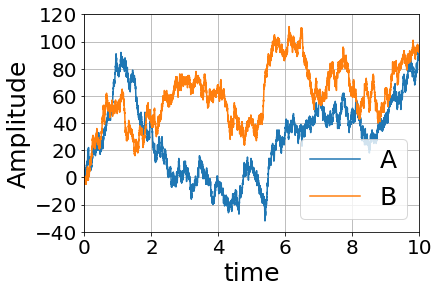

In [4]:
#first variant of defining velocity amplitudes
#flow field

A = [0]
B = [0]
np.random.seed(2023)
for i in range(nt-1):
    A.append(A[i]+np.random.choice([-1,1]))

#np.random.seed(2023)
for i in range(nt-1):
    
    B.append(B[i]+np.random.choice([-1,1]))
    
A = np.array(A)
B = np.array(B)

plt.plot(t1,A,label = 'A')
plt.plot(t1,B, label = 'B')

plt.grid()
plt.xlim([0.,t])
plt.ylim([-40,120])
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('time',fontsize = 25)
plt.ylabel('Amplitude', fontsize = 25)
plt.legend(fontsize = 25)

Text(0.5, 1.0, '$u_y$')

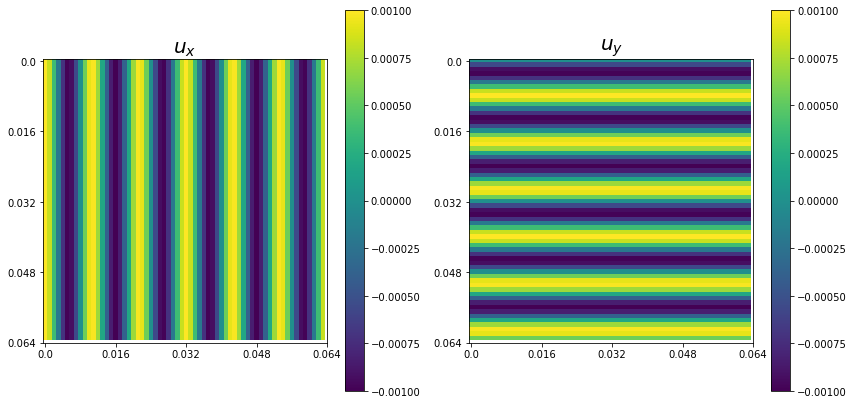

In [5]:


ux = np.zeros([nx,ny,nt])
uy = np.zeros([nx,ny,nt])
t0 = time.time()


for ix in range(nx):
    for iy in range(ny):
            ux[ix,iy,:] = 0.001*np.cos(6.*2.*np.pi*iy*dy/L)
            uy[ix,iy,:] = 0.001*np.sin(6.*2.*np.pi*ix*dx/L)
for it in range(nt):           
    ux[:,:,it] = A[it]*ux[:,:,it]
    uy[:,:,it] = B[it]*uy[:,:,it]

fig,ax=plt.subplots(1,2, figsize=(14, 7))

cp1 = ax[0].imshow(ux[:,:,1])
fig.colorbar(cp1,ax = ax[0])


cp1 = ax[1].imshow(uy[:,:,1])
fig.colorbar(cp1,ax = ax[1])

for i in range(2):
    ax[i].set_xticks([0,16,32,48,64])
    ax[i].set_xticklabels([0.,.016,0.032,0.048,.064])
    ax[i].set_yticks([0,16,32,48,64])
    ax[i].set_yticklabels([0.,.016,0.032,0.048,.064])
    
ax[0].set_title(r'$u_x$',fontsize = 20)
ax[1].set_title(r'$u_y$',fontsize = 20)

In [10]:
#second variant

T1=100.
alpha = 2.11/T1
beta = 3.73/T1
gamma = 4.11/T1

y = np.array([])
y = np.append(y,0.19)
y = np.append(y,0.19)
for k in range(2,nt):
    uk = 0.1*(np.sin(2.*np.pi*alpha*k)*np.sin(2.*np.pi*beta*k)*np.sin(2.*np.pi*gamma*k)+1.)
    yk = 0.4*y[k-1] + 0.4*y[k-1]*y[k-2]+0.6*uk**3.+0.1
    y = np.append(y,yk)
    
A = y

alpha = 2.84/T1
beta = 3.1/T1
gamma = 4.67/T1

y = np.array([])
y = np.append(y,0.19)
y = np.append(y,0.19)
for k in range(2,nt):
    uk = 0.1*(np.sin(2.*np.pi*alpha*k)*np.sin(2.*np.pi*beta*k)*np.sin(2.*np.pi*gamma*k)+1.)
    yk = 0.4*y[k-1] + 0.4*y[k-1]*y[k-2]+0.6*uk**3.+0.1
    y = np.append(y,yk)
B = y    

ux = np.zeros([nx,ny,nt])
uy = np.zeros([nx,ny,nt])
t0 = time.time()


for ix in range(nx):
    for iy in range(ny):
            #ux[ix,iy,:] = 0.0006*np.cos(10.*2.*np.pi*ix*dx/L)*np.cos(6.*2.*np.pi*iy*dy/L)
            #uy[ix,iy,:] = 0.001*np.sin(10.*2.*np.pi*ix*dx/L)*np.sin(6.*2*np.pi*iy*dy/L)
            ux[ix,iy,:] = 0.001*np.cos(6.*2.*np.pi*iy*dy/L)
            uy[ix,iy,:] = 0.001*np.sin(6.*2.*np.pi*ix*dx/L)
for it in range(nt):           
    ux[:,:,it] = A[it]*ux[:,:,it]
    uy[:,:,it] = B[it]*uy[:,:,it]

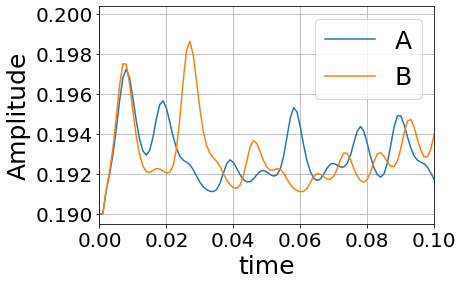

In [11]:
plt.plot(t1,A,label = 'A')
plt.plot(t1,B, label = 'B')

plt.grid()
plt.xlim([0.,0.1])
#plt.ylim([-40,120])
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('time',fontsize = 25)
plt.ylabel('Amplitude', fontsize = 25)
plt.legend(fontsize = 25)

Text(0.5, 1.0, '$u_y$')

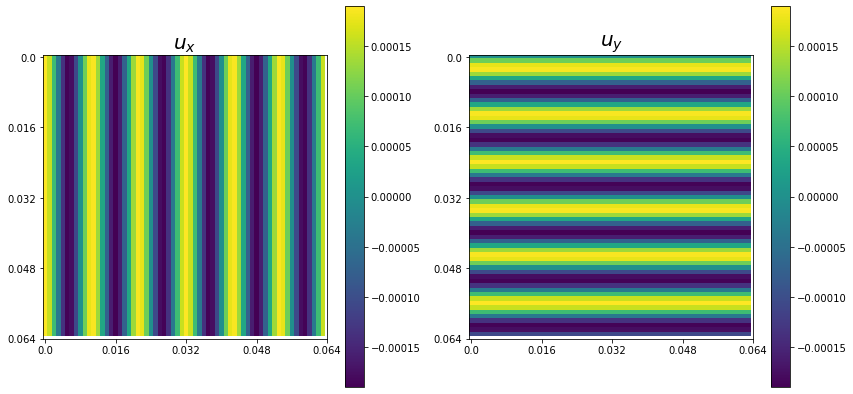

In [12]:
fig,ax=plt.subplots(1,2, figsize=(14, 7))

cp1 = ax[0].imshow(ux[:,:,1])
fig.colorbar(cp1,ax = ax[0])


cp1 = ax[1].imshow(uy[:,:,1])
fig.colorbar(cp1,ax = ax[1])

for i in range(2):
    ax[i].set_xticks([0,16,32,48,64])
    ax[i].set_xticklabels([0.,.016,0.032,0.048,.064])
    ax[i].set_yticks([0,16,32,48,64])
    ax[i].set_yticklabels([0.,.016,0.032,0.048,.064])
    
ax[0].set_title(r'$u_x$',fontsize = 20)
ax[1].set_title(r'$u_y$',fontsize = 20)

In [13]:
#subroutines to write and read data of particles
os.system('mkdir part_data')

def write_data(it):
    with open('part_data/snapshot{:00005d}'.format(it), 'w') as f:
        for pi in range(n_p):
            f.write(str(p_list[pi].x) +" " + str(p_list[pi].y) + "\n")
            
def read_data(it):
    p_arr = []
    with open('part_data/snapshot{:00005d}'.format(it), 'r') as f:
        for pi in range(n_p):
            lines = f.readlines()
            for l in lines:
                l1 = l.split()
                p_arr.append(Particle([float(l1[0]), float(l1[1])]))
    return p_arr

In [14]:
#check CRL criteria
crl = np.max([np.max(ux),np.max(uy)])*dt/dx
print("CRL = ", crl)

CRL =  0.00019989557914900483


In [15]:
#define PArticle class
class Particle:
    def __init__(self, X0=[np.random.rand()*L,np.random.rand()*L]):
        self.x = X0[0]
        self.y = X0[1]
        self.ux = 0.
        self.uy = 0.
        self.v = 0.
    
    #finction for linear interpolation
    def lin_int(self,u,x,y):
        
        x_r = np.floor(x/dx).astype(int)
        y_r = np.floor(y/dy).astype(int)
        
        u11 = u[x_r,y_r]
        u12 = u[x_r,y_r+1]
        u21 = u[x_r+1,y_r]
        u22 = u[x_r+1,y_r+1]
        
        x1 = float(x_r)*dx
        x2 = float(x_r)*dx+dx        
        y1 = float(y_r)*dy
        y2 = float(y_r)*dy+dy
        
        #weights
        w11 = (x2-x)*(y2-y)/dx/dy
        w21 = (x-x1)*(y2-y)/dx/dy
        w12 = (x2-x)*(y-y1)/dx/dy
        w22 = (x-x1)*(y-y1)/dx/dy
        return  w11*u11 + w12*u12 + w21*u21 + w22*u22
    #function for ghost cells
    def ghost_cell(self, u):
        if(len(u.shape)==3):
            unew = np.zeros(np.array(u.shape)+[2,2,0])
        
            unew[:-2,:-2,:] = u
            unew[-2:,:-2,:] = u[0:2,:,:]
            unew[:-2,-2:,:] = u[:,0:2,:]
        else:
            unew = np.zeros(np.array(u.shape)+[2,2])
            
            unew[:-2,:-2] = u
            unew[-2:,:-2] = u[0:2,:]
            unew[:-2,-2:] = u[:,0:2]
        return unew    
    
    #get velocity field for current particle
    def vel(self,u, t):
        self.check_peridicty()
        
        u1 = self.ghost_cell(u)
               
        self.v = self.lin_int(u1, self.x, self.y)
     
        return self.v
    #box is periodic
    def check_peridicty(self):
        
        if(self.x > L): 
            
            self.x -= L
        if(self.y > L): 
            self.y -= L
        if(self.x < 0.0): 
            #print(self.x)
            self.x+=L
            #print(self.x)
        if(self.y < 0.0): 
            self.y+=L
    #integration of trajectory    
    def rk45(self,u1,t,s):
        self.check_peridicty()
        u = self.ghost_cell(u1)
        
        k1 = self.vel(u[:,:,0],t)
        
        u_t_plus_half = (u[:,:,1] - u[:,:,0])/2.
        if(s == "x"):
            
            k2 = self.lin_int(u_t_plus_half, self.x+dt/2.*k1, self.y)
            k3 = self.lin_int(u_t_plus_half, self.x+dt/2.*k2, self.y)
            k4 = self.lin_int(u_t_plus_half, self.x+dt/2.*k3, self.y)
            
            
        if(s == "y"):
            self.check_peridicty()
            k2 = self.lin_int(u_t_plus_half, self.x, self.y+dt/2.*k1)
            k3 = self.lin_int(u_t_plus_half, self.x, self.y+dt/2.*k2)
            k4 = self.lin_int(u_t_plus_half, self.x, self.y+dt/2.*k3)
        
        return (k1 + 2.*k2 + 3.*k3 + k4)/6.

In [16]:
#randomly chosen mean values of gaussian pdf for x and y coordinates


x_c = np.random.uniform(L/4, L-L/4)
y_c = np.random.uniform(L/4, L-L/4)

n_p = 100
p_list = [Particle([np.random.normal(x_c,L/8),np.random.normal(y_c,L/8)]) for _ in range(n_p)]

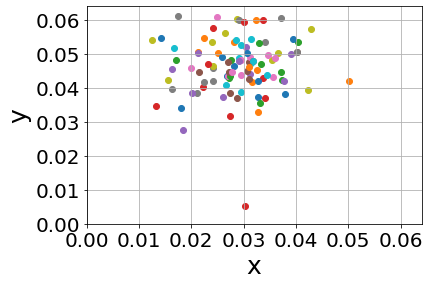

In [27]:
for part in p_list:
    plt.scatter(part.x, part.y)
plt.xlim([0,L])
plt.ylim([0,L])

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('x',fontsize = 25)
plt.ylabel('y',fontsize = 25)
plt.grid()

In [18]:
time1 = time.time()


x_p = []
y_p = []

ux_p = []
uy_p = []

for t in range(1001):
    
    for a in p_list:
        #print(a.x)
        a.check_peridicty()
        a.ux = a.vel(ux[:,:,t],t)
        a.uy = a.vel(uy[:,:,t],t)
        a.x = a.x + dt*a.ux#a.rk45(ux[:,:,t:t+2],t,"x")
        a.y = a.y + dt*a.uy#a.rk45(uy[:,:,t:t+2],t,"y")
        a.check_peridicty()
    if((t%20==0) or (t==0)):
        x = np.array([p_list[i].x for i in range(int(n_p))])
        y = np.array([p_list[i].y for i in range(int(n_p))])
        ux1 = np.array([p_list[i].ux for i in range(int(n_p))])
        uy1 = np.array([p_list[i].uy for i in range(int(n_p))])
        print("Written")
        x_p.append(x)
        y_p.append(y)
        ux_p.append(ux1)
        uy_p.append(uy1)
        print(t, "/", nt-1)
        clear_output(wait=True)
    if((t%100==0) or (t==0)):
        
        write_data(t)
        
    #print(p_list[0].x)
        time.sleep(0.0000001)
t2 = time.time()
print(t2-time1, " sec")

10.652609586715698  sec


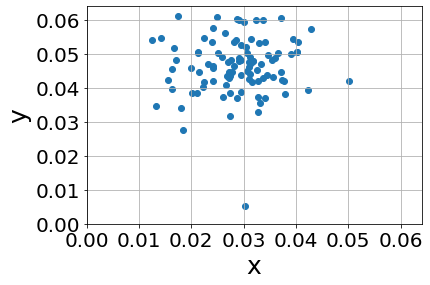

In [26]:
plt.scatter(x_p[-1],y_p[-1])

    
plt.xlim([0,L])
plt.ylim([0,L])

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('x',fontsize = 25)
plt.ylabel('y',fontsize = 25)
plt.grid()